In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#creating colormap
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

colors1 = ["lavender", "lightpink", "peachpuff"]
cmap1 = LinearSegmentedColormap.from_list("mycmap", colors1)

colors2 = ["darkseagreen", "darkgreen","mediumpurple", "salmon", "palevioletred","lavender", "lightpink", "peachpuff", "mintcream", "cadetblue", "thistle", "lightyellow", "mintcream", "powderblue"]
cmap2 = LinearSegmentedColormap.from_list("mycmap", colors2)

In [3]:
df=pd.read_csv("./df_final.csv")

In [3]:
df=pd.read_csv("/home/mailan/Bureau/df_lem_sw.csv")

# Genre des annonces

In [4]:
# Première méthode, très simple

genre=[]
femme=0
homme=0

for annonce in df["Annonces"]:
    if "femme" in str(annonce):
        genre.append("F")
        femme+=1
    if "homme" in str(annonce):
        genre.append("H")
        homme+=1

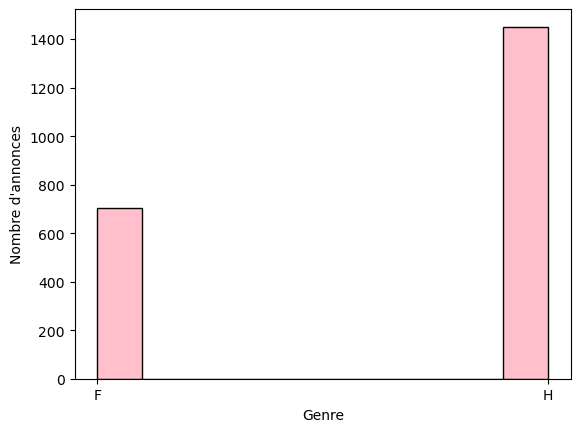

In [57]:
plt.hist(genre, edgecolor='black', color="pink")
plt.xlabel('Genre')
plt.ylabel("Nombre d'annonces")
plt.show()

In [8]:
# pour éviter de prendre en compte des mots-clés (femme, garçon, ...) qui ne correspondraient pas au genre 
# de l'annonceur (ex: "un jeune homme de province, sans femme ni enfants": on veut prendre en compte homme et pas femme)
# on sélectionne les 5 premiers mots de l'annonce


# Fonction pour extraire les 5 premiers mots d'une chaîne de caractères
def extraire_5_premiers_mots(annonce):
    mots = annonce.split(' ')
    return ' '.join(mots[:5])

# Application de la fonction d'extraction aux lignes de la colonne "Annonces"
df['Premiers_Mots'] = df['Annonces'].apply(extraire_5_premiers_mots)


# Application de l'expression régulière et création de la nouvelle colonne "Genre"
F=re.compile(r"femme|fille|dame|demoiselle|particulière|veuve|citoyenne|la cit\.|dlle|mlle|la nommée", re.IGNORECASE)
H=re.compile(r"homme|garçon|particulier|citoyen|le cit\.|sieur| le nommé", re.IGNORECASE)
Personne=re.compile(r"personne", re.IGNORECASE)


conditions=[df['Premiers_Mots'].str.contains(F), df['Premiers_Mots'].str.contains(H), df['Premiers_Mots'].str.contains(Personne)]
genre=["F","H", "Personne"]
df["Genre"]=np.select(conditions,genre, np.NaN)


# colonne contenant le mot genré "discriminant"
femme=re.compile(r"femme", re.IGNORECASE)
fille=re.compile(r"fille", re.IGNORECASE)
dame=re.compile(r"dame", re.IGNORECASE)
demoiselle=re.compile(r"demoiselle|dlle|mlle|mademoiselle", re.IGNORECASE)
particulière=re.compile(r"particulière", re.IGNORECASE)
veuve=re.compile(r"veuve", re.IGNORECASE)
citoyenne=re.compile(r"citoyenne|la cit\.", re.IGNORECASE)
nommée=re.compile(r"la nommée", re.IGNORECASE)

homme=re.compile(r"homme", re.IGNORECASE)
garçon=re.compile(r"garçon", re.IGNORECASE)
particulier=re.compile(r"particulier", re.IGNORECASE)
citoyen=re.compile(r"citoyen|le cit\.", re.IGNORECASE)
sieur=re.compile(r"sieur", re.IGNORECASE)
nommé=re.compile(r"le nommé", re.IGNORECASE)

personne=re.compile(r"personne", re.IGNORECASE)


conditions=[df['Premiers_Mots'].str.contains(femme), df['Premiers_Mots'].str.contains(fille), df['Premiers_Mots'].str.contains(dame), df['Premiers_Mots'].str.contains(demoiselle), df['Premiers_Mots'].str.contains(particulière), df['Premiers_Mots'].str.contains(veuve), df['Premiers_Mots'].str.contains(citoyenne), df['Premiers_Mots'].str.contains(nommée), df['Premiers_Mots'].str.contains(homme), df['Premiers_Mots'].str.contains(garçon), df['Premiers_Mots'].str.contains(particulier), df['Premiers_Mots'].str.contains(citoyen), df['Premiers_Mots'].str.contains(sieur), df['Premiers_Mots'].str.contains(nommé), df['Premiers_Mots'].str.contains(personne)]
genre=["femme", "fille", "dame", "demoiselle", "particulière", "veuve", "citoyenne", "nommée", "homme", "garçon", "particulier", "citoyen", "sieur", "nommé", "personne"]
df["Qualificatif de genre"]=np.select(conditions,genre, np.NaN)

# Suppression de la colonne temporaire "Premiers_Mots"
df = df.drop('Premiers_Mots', axis=1)


df

,Ville,Année,Mois,Jour,Annonces,Annonces lemmatisees,Annonces sans stopwords,Annonces lemmatisées sans stopwords,Annonces spacy_clean,Genre,Qualificatif de genre
0,Paris,1804,3,30,"Une personne de 24 ans, d'un extérieur agréabl...","un personne de 24 an , de un extérieur agréabl...","24 ans , extérieur agréable , reçu éducation ,...","24 an , extérieur agréable , recevoir éducatio...",an extérieur agréable recevoir éducation joind...,Personne,personne
1,Paris,1804,3,30,"Une demoiselle, âgée de 28 ans, sachant parfai...","un demoiselle , âger de 28 an , savoir parfait...","demoiselle , âgée 28 ans , sachant parfaitemen...","demoiselle , âger 28 an , savoir parfaitement ...",demoisell âger an savoir parfaitement bien tra...,F,demoiselle
2,Paris,1804,3,30,"Une femme de 30 ans, sachant faire la cuisine,...","un femme de 30 an , savoir faire le cuisine , ...","femme 30 ans , sachant faire cuisine , coudre ...","femme 30 an , savoir faire cuisine , coudre bl...",femme an savoir faire cuisine coudre blanchir ...,F,femme
3,Paris,1804,3,30,"Un citoyen d'un âge mûr, sachant raser, coëffe...","un citoyen de un âge mûr , savoir raser , coëf...","citoyen âge mûr , sachant raser , coëffer , fa...","citoyen âge mûr , savoir raser , coëffer , fai...",citoyen âge mûr savoir raser coëffer faire pet...,H,citoyen
4,Paris,1804,3,30,"Une jeune personne, âgée de 17 ans, sachant li...","un jeune personne , âger de 17 an , savoir lir...","jeune , âgée 17 ans , sachant lire , écrire , ...","jeune , âger 17 an , savoir lire , écrire , bl...",jeune âger an savoir lire écrire blanchir repa...,Personne,personne
...,...,...,...,...,...,...,...,...,...,...,...
5059,Bordeaux,1758,11,9,Un jeune homme qui a tenu pendant trois ans le...,un jeune homme qui avoir tenir pendant trois a...,"jeune homme tenu ans Livres , Comptoir , deman...","jeune homme tenir an livre , comptoir , demand...",jeune homme tenir an livre comptoir demande pl...,H,homme
5060,Bordeaux,1758,8,1,"Un jeune homme de 23 à 24 ans, qui sçait bien ...","un jeune homme de 23 à 24 an , qui sçer bien é...","jeune homme 23 24 ans , sçait bien écrire , de...","jeune homme 23 24 an , sçer bien écrire , dema...",jeune homme an sçer bien écrire demande placer...,H,homme
5061,Bordeaux,1759,6,14,"„ Minimes, qui commençoient à s'établir en » F...","„ minime , qui commençoier à se établir en » F...","„ Minimes , commençoient établir » France , & ...","„ minime , commençoier établir » France , et S...",minime commençoier établir France Saint Franço...,nan,nan
5062,Bordeaux,1760,3,6,Le sacrifice que les Français ont fait de leur...,le sacrifice que le français avoir faire de so...,sacrifice Français - selle argent besoins Etat...,sacrifice français - selle argent besoin etat ...,sacrifice français sell argent besoin etat fig...,nan,nan


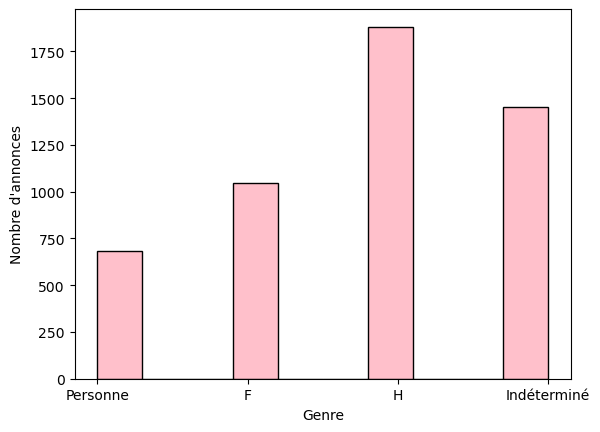

In [39]:
df_str=df.replace(np.nan, "Indéterminé")

plt.hist(df_str["Genre"].astype(str), edgecolor="black", color="pink")
plt.xlabel("Genre")
plt.ylabel("Nombre d'annonces")
plt.show()

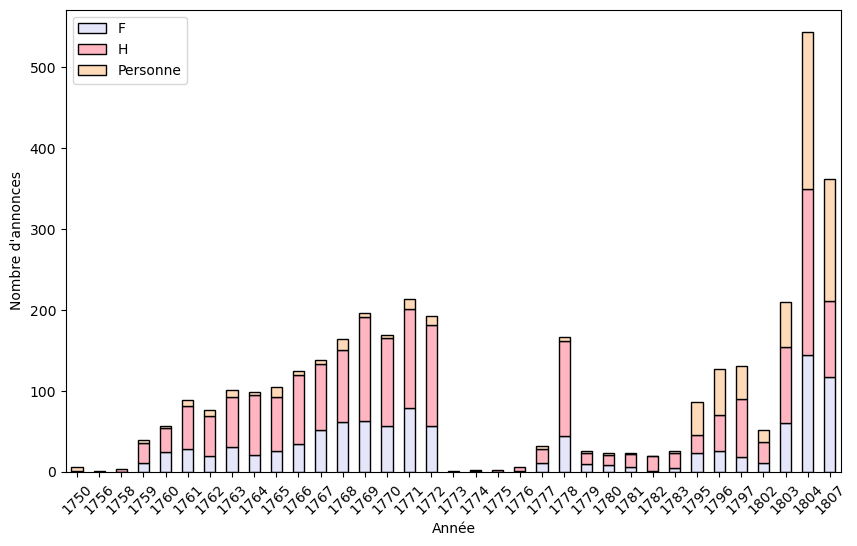

In [41]:
# GENRE ET ÉVO CHRONO

df_grouped = df.groupby(['Année', 'Genre']).size().unstack()

ax=df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap=cmap1, edgecolor='black')
plt.xlabel('Année')
plt.ylabel("Nombre d\'annonces")
plt.legend()
plt.xticks(rotation=45)

plt.show()

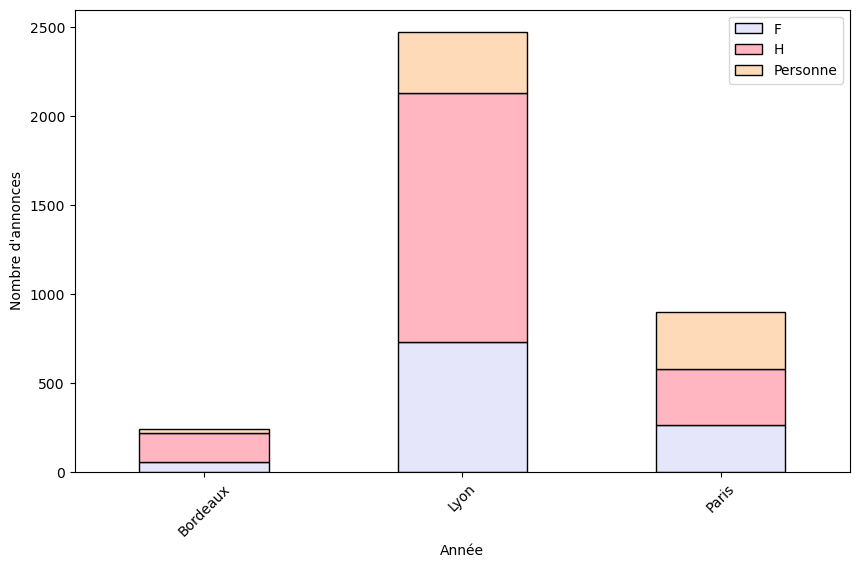

In [42]:
# GENRE ET VILLE

df_grouped = df.groupby(['Ville', 'Genre']).size().unstack()

ax=df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap=cmap1, edgecolor='black')
plt.xlabel('Année')
plt.ylabel("Nombre d\'annonces")
plt.legend()
plt.xticks(rotation=45)

plt.show()

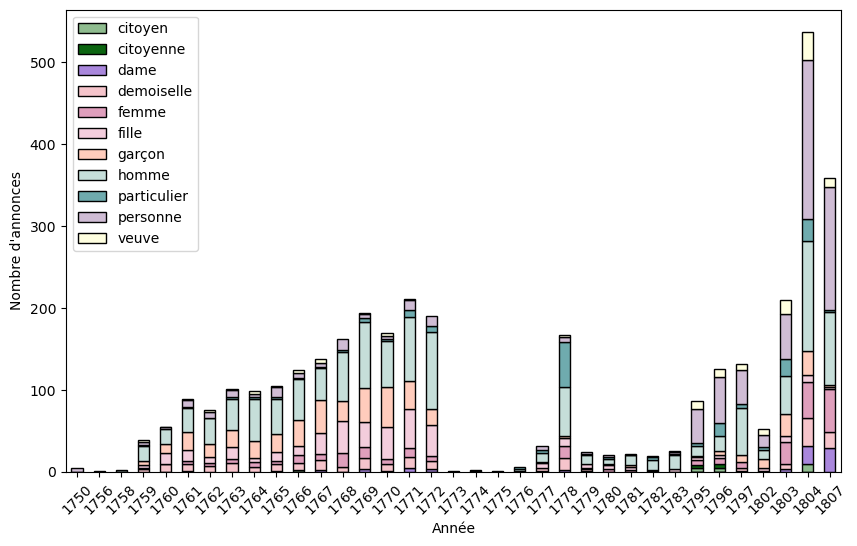

In [39]:
# QUALIF GENRE ET ÉVO CHRONO

df_grouped = df.groupby(['Année', 'Qualificatif de genre']).size().unstack()

ax=df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap=cmap2, edgecolor='black')
plt.xlabel('Année')
plt.ylabel("Nombre d\'annonces")
plt.legend()
plt.xticks(rotation=45)

plt.show()

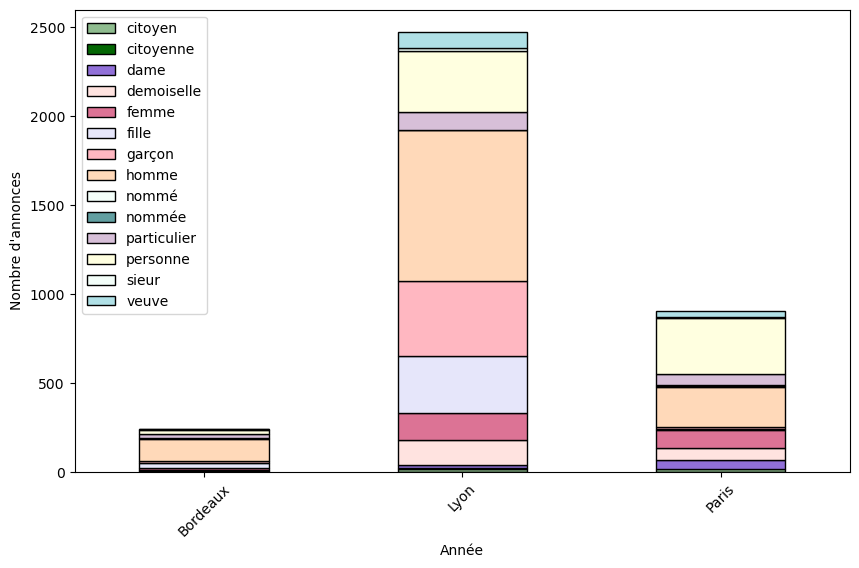

In [45]:
# QUALIF GENRE ET VILLE

df_grouped = df.groupby(['Ville', 'Qualificatif de genre']).size().unstack()

ax=df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap=cmap2, edgecolor='black')
plt.xlabel('Année')
plt.ylabel("Nombre d\'annonces")
plt.legend()
plt.xticks(rotation=45)

plt.show()

# Âge des annonces

In [9]:
ages=[]
for i in df["Annonces"]:
    pattern=re.search(r"(\w+-?\w*?) an(née)?s", str(i))
    if pattern:
        age=pattern.group(1)
        ages.append(age.lower())
print(len(ages))

1691


In [10]:
# convertir âges en lettres en nombres

#!pip install text2num

from text_to_num import text2num

In [11]:
ages_int=[]
reste=[]
for age in ages:
    try: 
        ages_int.append(int(age)) # pour les âges déjà en chiffres, on les convertit de str en int
    except SyntaxError and ValueError:  
        try:
            age_conv=text2num(age, "fr") # pour les âges en lettres, on essaie de les couvertir en chiffres
            ages_int.append(int(age_conv))
        except ValueError:
            reste.append(age) # si le format n'est pas convertible (erreurs d'ocr etc.), on passe
            pass

In [94]:
reste #des problèmes d'océrisation, et des quantifieurs non chiffrés: plusieurs, quelques... 

['3o',
 '3o',
 '3o',
 'longues',
 'quelques',
 '3o',
 '3q',
 'qeelques',
 'vingt-un',
 'vingt-un',
 'trente-un',
 'cine',
 'vingt-un',
 'vingt-un',
 'vingt-un',
 'plusieurs',
 'vingt-un',
 'vingt-un',
 'vingt-einq',
 'soize',
 'trente-rois',
 'cin-quante',
 'trentes-six',
 'tre',
 'trente-quâtre',
 'dix-huir',
 'vingt-un',
 'vingt-un',
 'vingr-huit',
 'vingt-un',
 'vingt-un',
 'plusieurs',
 'quelques',
 'trente-fix',
 'vingr',
 'quelques',
 'plusieurs',
 'feize',
 'x-huit',
 'quelques',
 'plusieurs',
 'trente-un',
 'vingt-un',
 'trente-un',
 'tronte-huit',
 'vingt-fix',
 'trente-fix',
 'plusieurs',
 'trente-fix',
 'trente-fix',
 'foixante-huit',
 'quelques',
 'dis-reuf',
 'quel-ques',
 'feize',
 'treme',
 'plusieurs',
 'plusieurs',
 'plusieurs',
 'des',
 'vingt-fix',
 'plusieurs',
 'longues',
 'vingt-un',
 'vingt-fix']

In [98]:
from statistics import mean
from statistics import median
 
moyenne=mean(ages_int)
mediane=median(ages_int)

print("La moyenne d'âge est de", moyenne, "ans.")
print("La médiane d'âge est de", mediane, "ans.")

La moyenne d'âge est de 28.396250808015512 ans.
La médiane d'âge est de 28 ans.


In [13]:
# Ajouter une colonne âge


df["Âge"]=df["Annonces"].str.extract(r"(\w+-?\w*?) an(?:née)?s", re.IGNORECASE)
df

,Ville,Année,Mois,Jour,Annonces,Annonces lemmatisees,Annonces sans stopwords,Annonces lemmatisées sans stopwords,Annonces spacy_clean,Genre,Qualificatif de genre,Âge
0,Paris,1804,3,30,"Une personne de 24 ans, d'un extérieur agréabl...","un personne de 24 an , de un extérieur agréabl...","24 ans , extérieur agréable , reçu éducation ,...","24 an , extérieur agréable , recevoir éducatio...",an extérieur agréable recevoir éducation joind...,Personne,personne,24
1,Paris,1804,3,30,"Une demoiselle, âgée de 28 ans, sachant parfai...","un demoiselle , âger de 28 an , savoir parfait...","demoiselle , âgée 28 ans , sachant parfaitemen...","demoiselle , âger 28 an , savoir parfaitement ...",demoisell âger an savoir parfaitement bien tra...,F,demoiselle,28
2,Paris,1804,3,30,"Une femme de 30 ans, sachant faire la cuisine,...","un femme de 30 an , savoir faire le cuisine , ...","femme 30 ans , sachant faire cuisine , coudre ...","femme 30 an , savoir faire cuisine , coudre bl...",femme an savoir faire cuisine coudre blanchir ...,F,femme,30
3,Paris,1804,3,30,"Un citoyen d'un âge mûr, sachant raser, coëffe...","un citoyen de un âge mûr , savoir raser , coëf...","citoyen âge mûr , sachant raser , coëffer , fa...","citoyen âge mûr , savoir raser , coëffer , fai...",citoyen âge mûr savoir raser coëffer faire pet...,H,citoyen,NaN
4,Paris,1804,3,30,"Une jeune personne, âgée de 17 ans, sachant li...","un jeune personne , âger de 17 an , savoir lir...","jeune , âgée 17 ans , sachant lire , écrire , ...","jeune , âger 17 an , savoir lire , écrire , bl...",jeune âger an savoir lire écrire blanchir repa...,Personne,personne,17
...,...,...,...,...,...,...,...,...,...,...,...,...
5059,Bordeaux,1758,11,9,Un jeune homme qui a tenu pendant trois ans le...,un jeune homme qui avoir tenir pendant trois a...,"jeune homme tenu ans Livres , Comptoir , deman...","jeune homme tenir an livre , comptoir , demand...",jeune homme tenir an livre comptoir demande pl...,H,homme,trois
5060,Bordeaux,1758,8,1,"Un jeune homme de 23 à 24 ans, qui sçait bien ...","un jeune homme de 23 à 24 an , qui sçer bien é...","jeune homme 23 24 ans , sçait bien écrire , de...","jeune homme 23 24 an , sçer bien écrire , dema...",jeune homme an sçer bien écrire demande placer...,H,homme,24
5061,Bordeaux,1759,6,14,"„ Minimes, qui commençoient à s'établir en » F...","„ minime , qui commençoier à se établir en » F...","„ Minimes , commençoient établir » France , & ...","„ minime , commençoier établir » France , et S...",minime commençoier établir France Saint Franço...,nan,nan,NaN
5062,Bordeaux,1760,3,6,Le sacrifice que les Français ont fait de leur...,le sacrifice que le français avoir faire de so...,sacrifice Français - selle argent besoins Etat...,sacrifice français - selle argent besoin etat ...,sacrifice français sell argent besoin etat fig...,nan,nan,Deux


In [14]:
# on harmonise tout en int + conversion des âges en lettres en âges en chiffres


df["Âge"] = df["Âge"].fillna(0) 

for age in df["Âge"]:
    try: 
        df['Âge'] = df['Âge'].replace([age], int(age)) # pour les âges déjà en chiffres, on les convertit de str en int
    except ValueError:  
        try:
            df['Âge'] = df['Âge'].replace([age], int(text2num(age, "fr")))# pour les âges en lettres, on essaie de les couvertir en chiffres
        except ValueError:
            df['Âge'] = df['Âge'].replace([age], 0) # si le format n'est pas convertible (erreurs d'ocr, nan etc.), on passe
            
df['Âge'] = df['Âge'].astype('int')
df['Âge'] = np.where(df['Âge'] < 10, np.nan, df['Âge'])# pour les valeurs trop petites, qui ne sont probablement pas des âges

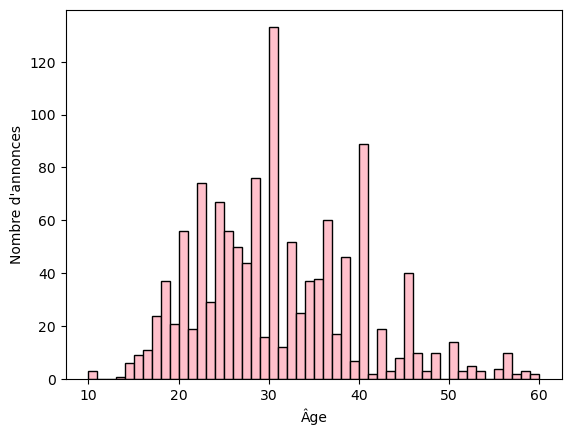

In [107]:
plt.hist(df["Âge"], edgecolor='black', color="pink", bins=50)
plt.xlabel('Âge')
plt.ylabel("Nombre d'annonces")
plt.show()

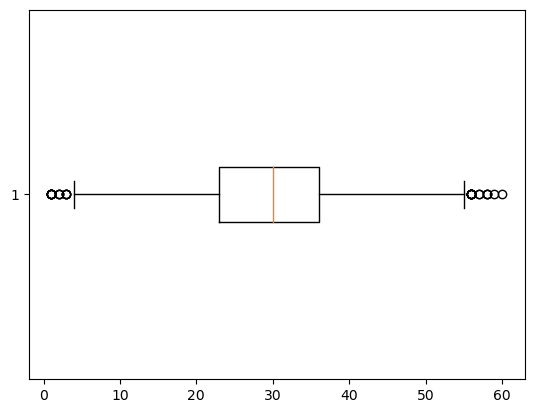

In [109]:
plt.boxplot(ages_int, vert=False)
plt.show()

In [111]:
# CORRÉLATION AGE ET GENRE

df['Genre as cat']=df['Genre'].astype('category').cat.codes
corr=df['Âge'].corr(df['Genre as cat'])

In [112]:
corr

-0.08573021635320494

In [113]:
# Age femmes

df_F= df[df['Genre']=="F"]

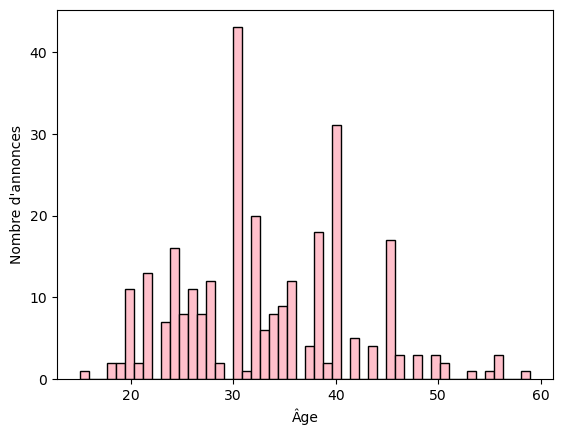

In [114]:
plt.hist(df_F["Âge"], edgecolor='black', color="pink", bins=50)
plt.xlabel('Âge')
plt.ylabel("Nombre d'annonces")
plt.show()

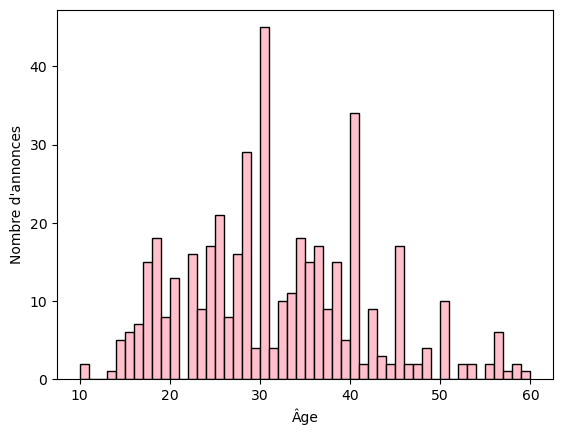

In [117]:
# Age hommes

df_H= df[df['Genre']=="H"]

plt.hist(df_H["Âge"], edgecolor='black', color="pink", bins=50)
plt.xlabel('Âge')
plt.ylabel("Nombre d'annonces")
plt.show()

# Origines

In [15]:
def extraire_origine(annonce):
    regex_origine="(?:arrivant |arrivé | arrivée |natif |native |venu |venue )(?:des |du |de )(?:son )?(?:la )?(?:cette )?(?:St\. )?(?:(?i)\w+)"
    origine=re.findall(regex_origine, annonce, re.UNICODE)
    if len(origine)!=0:
        return " ".join(i for i in origine)
    else:
        return np.nan

In [16]:
df["Origine"]=df["Annonces"].apply(extraire_origine)

/tmp/ipykernel_23832/2430149283.py:3: DeprecationWarning: Flags not at the start of the expression '(?:arrivant |arrivé ' (truncated) but at position 116
  origine=re.findall(regex_origine, annonce, re.UNICODE)


In [17]:
def extraire_lieu(annonce):
    regex_lieu="(?:arrivant |arrivé | arrivée |natif |native |venu |venue )(?:des |du |de )(?:son )?(?:la )?(?:cette )?(?:St\. )?((?i)\w+)"
    lieu=re.findall(regex_lieu, annonce, re.UNICODE)
    if len(lieu)!=0:
        return " ".join(i for i in lieu)
    else:
        return np.nan

In [18]:
df["Lieu d'origine"]=df["Annonces"].apply(extraire_lieu)

/tmp/ipykernel_23832/1601887336.py:3: DeprecationWarning: Flags not at the start of the expression '(?:arrivant |arrivé ' (truncated) but at position 114
  lieu=re.findall(regex_lieu, annonce, re.UNICODE)


In [105]:
origine_df_Lyon=origine_df[origine_df["Ville"]=="Lyon"]

In [106]:
origine_df_Paris=origine_df[origine_df["Ville"]=="Paris"]

In [107]:
origine_df_Bordeaux=origine_df[origine_df["Ville"]=="Bordeaux"]

# Situation

In [19]:
def extraire_situation(annonce):
    regex_situation="celibataire|célibataire|sans femme|sans mari|sans enfant?s?|sans femme ni enfant?s?| sans mari ni enfant?s?|sans famille|sans suite|veuf|veuve|(?<!non)mariée?|non mariée?|couple"
    situation=re.findall(regex_situation, annonce, re.UNICODE)
    if len(situation)!=0:
        return " ".join(i for i in situation)
    else:
        return np.nan

In [20]:
df["Situation"]=df["Annonces"].apply(extraire_situation)

In [23]:
df.to_csv("./df_final.csv", index=False)